# 1. linear regression

In [24]:
# note from : https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/pytorch_basics/main.py

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [19]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [20]:
# define model
model = nn.Linear(1, 1)

In [21]:
# define loss function & optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  

In [22]:
# Train the model
for epoch in range(500):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 10, loss.item()))

Epoch [5/10], Loss: 0.1689
Epoch [10/10], Loss: 0.1689
Epoch [15/10], Loss: 0.1689
Epoch [20/10], Loss: 0.1689
Epoch [25/10], Loss: 0.1689
Epoch [30/10], Loss: 0.1689
Epoch [35/10], Loss: 0.1689
Epoch [40/10], Loss: 0.1689
Epoch [45/10], Loss: 0.1689
Epoch [50/10], Loss: 0.1689
Epoch [55/10], Loss: 0.1689
Epoch [60/10], Loss: 0.1689
Epoch [65/10], Loss: 0.1689
Epoch [70/10], Loss: 0.1689
Epoch [75/10], Loss: 0.1689
Epoch [80/10], Loss: 0.1689
Epoch [85/10], Loss: 0.1689
Epoch [90/10], Loss: 0.1689
Epoch [95/10], Loss: 0.1689
Epoch [100/10], Loss: 0.1689
Epoch [105/10], Loss: 0.1689
Epoch [110/10], Loss: 0.1689
Epoch [115/10], Loss: 0.1689
Epoch [120/10], Loss: 0.1689
Epoch [125/10], Loss: 0.1689
Epoch [130/10], Loss: 0.1689
Epoch [135/10], Loss: 0.1689
Epoch [140/10], Loss: 0.1689
Epoch [145/10], Loss: 0.1689
Epoch [150/10], Loss: 0.1689
Epoch [155/10], Loss: 0.1689
Epoch [160/10], Loss: 0.1689
Epoch [165/10], Loss: 0.1689
Epoch [170/10], Loss: 0.1689
Epoch [175/10], Loss: 0.1689
Epoch

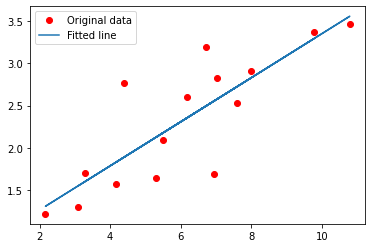

In [23]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# 2. Logistic regression with dataset
### 1) prepare dataset

In [66]:
class LibsvmTransformer:
    def __init__(self, train_path, valid_path, batch_size, input_dim):
        self._train_path = train_path
        self._valid_path = valid_path
        self._batch_size = batch_size
        self._input_dim = input_dim
        self._init_stream()
        
    def _init_stream(self):
        self._train_streamer = self.stream_docs(path=self._train_path)
        
    def stream_docs(self, path):
        """
        Lazy function (generator) to read a file piece by piece.
        Transform libsvm data format to numpy array.
        """
        with open(path, 'r', encoding='utf-8') as txt:
            for line in txt:
                if not line:
                    break
                y = int(line[0])
                x = np.zeros(self._input_dim)
                for tup in line[2:].split(" "):
                    x[int(tup.split(":")[0])] = int(tup.split(":")[1])
                yield x, y
                
    def get_minibatch(self):
        """
        Get mini-batch from dataset generator  
        """
        X = []
        Y = []
        try:
            for _ in range(self._batch_size):
                x_i, y_i = next(self._train_streamer)
                X.append(x_i)
                Y.append(y_i)
        except StopIteration:
            return None, None
        return np.array(X, dtype=np.float32), np.array(Y)

data_transformer = LibsvmTransformer(train_path='../../dataset/train.txt',
                                     valid_path='../../dataset/test.txt',
                                     input_dim=37,
                                     batch_size=64)

In [67]:
# define model
model = nn.Linear(37, 2)

In [68]:
# define loss function & optimizer
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)    

In [69]:
# Train the model
for epoch in range(500):
    # Convert numpy arrays to torch tensors
    x_train, y_train = data_transformer.get_minibatch()
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print(outputs)
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 10, loss.item()))

tensor([[ 0.1416, -0.1956],
        [ 0.2136,  0.1318],
        [ 0.2254,  0.0574],
        [-0.0554,  0.1409],
        [ 0.3044,  0.0236],
        [ 0.2772, -0.1779],
        [ 0.3940, -0.0851],
        [ 0.2525, -0.0462],
        [ 0.0269,  0.0236],
        [ 0.2772, -0.1779],
        [ 0.1416, -0.1956],
        [ 0.2136,  0.1318],
        [ 0.5570, -0.0475],
        [ 0.2136,  0.1318],
        [ 0.1541,  0.2584],
        [ 0.1416, -0.1956],
        [ 0.2524,  0.0218],
        [-0.0538, -0.1635],
        [ 0.5210, -0.0789],
        [ 0.1416, -0.1956],
        [ 0.1373,  0.3129],
        [ 0.4474, -0.0936],
        [-0.5255,  0.3582],
        [ 0.1876, -0.0692],
        [ 0.4589,  0.2812],
        [ 0.5644, -0.1825],
        [ 0.1876, -0.0692],
        [ 0.3119, -0.1047],
        [ 0.2585, -0.2220],
        [ 0.0228, -0.0673],
        [-0.1129, -0.0851],
        [ 0.1416, -0.1956],
        [-0.1129, -0.0851],
        [ 0.5210, -0.0789],
        [ 0.1807, -0.1640],
        [ 0.1416, -0

TypeError: expected np.ndarray (got NoneType)

In [ ]:
"python with open yield reset"